# **IMPORTAÇÕES**

In [12]:
import numpy as np
import pandas as pd
import dataprep
from dataprep.eda import create_report
from dataprep.eda import plot
import datetime


# **TABELA DESAFIO_PRICEAV.CSV**

In [13]:
priceav = pd.read_csv('desafio_priceav.csv', sep = ',')
priceav = priceav.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
pd.set_option('display.max_rows', 5)
priceav = priceav.apply(lambda booked_on: booked_on.replace('blank', 'Null'))

priceav.rename(columns = {'airbnb_listing_id' : 'airbnb_listing_id'}, inplace = True)
priceav


airbnb_listing_id            booked_on  ... price_string  occupied
0                40201349                 Null  ...        250.0         0
1                40201349                 Null  ...        250.0         0
...                   ...                  ...  ...          ...       ...
354518           40199361  2020-09-14 00:00:00  ...        250.0         1
354519           40199361  2020-12-03 00:00:00  ...        200.0         1

[354520 rows x 5 columns]

In [14]:
pc_id_asc = priceav.nsmallest(354521, 'airbnb_listing_id')
pc_id_asc


airbnb_listing_id            booked_on  ... price_string  occupied
174880             108658  2020-11-17 00:00:00  ...        300.0         1
174895             108658                 Null  ...        500.0         0
...                   ...                  ...  ...          ...       ...
354202           45575044  2021-01-06 00:00:00  ...        360.0         1
289645           45575044  2021-03-05 00:00:00  ...        200.0         1

[354520 rows x 5 columns]

# **TABELA DESAFIO_DETAILS.CSV**

In [15]:
details = pd.read_csv('desafio_details.csv', sep = ',')
details.rename(columns = {'suburb' : 'location'}, inplace = True)
details = details.drop(columns = ['Unnamed: 0'])
details


airbnb_listing_id      location  ... is_superhost  number_of_reviews
0              31389869        Jurerê  ...        False               15.0
1              40010667  Canasvieiras  ...        False                0.0
...                 ...           ...  ...          ...                ...
4689           31239515  Canasvieiras  ...         True                2.0
4690            5078051      Ingleses  ...        False               18.0

[4691 rows x 8 columns]

In [16]:
dt_id_asc = details.nsmallest(4691, 'airbnb_listing_id')
dt_id_asc


airbnb_listing_id            location  ... is_superhost  number_of_reviews
2063             108658        Canasvieiras  ...        False                0.0
1582             128631            Ingleses  ...        False                2.0
...                 ...                 ...  ...          ...                ...
3156           45575044  Lagoa da Conceição  ...         True               14.0
4483           45604139            Ingleses  ...        False                0.0

[4691 rows x 8 columns]

# **1. Ordene os bairros em ordem crescente de número de listings**

In [17]:
location_adname = details.iloc[:,[2, 1]]
num_listing = location_adname.groupby(['location']).count()
num_listing


ad_name
location                   
Canasvieiras           1177
Centro                  278
Ingleses               2388
Jurerê                  539
Lagoa da Conceição      309

In [18]:
num_listing_cres = num_listing.nsmallest(6, 'ad_name')
num_listing_cres


ad_name
location                   
Centro                  278
Lagoa da Conceição      309
Jurerê                  539
Canasvieiras           1177
Ingleses               2388

# **2. Ordene os bairros em ordem crescente de faturamento médio dos listings**

In [19]:
price_details = pd.merge(pc_id_asc, dt_id_asc, on=['airbnb_listing_id'], how='inner')
price_details_notnull = price_details.loc[price_details['booked_on'] != 'Null']
price_details_notnull


airbnb_listing_id            booked_on  ... is_superhost  number_of_reviews
0                  108658  2020-11-17 00:00:00  ...        False                0.0
9                  108658  2020-12-30 00:00:00  ...        False                0.0
...                   ...                  ...  ...          ...                ...
354518           45575044  2021-01-06 00:00:00  ...         True               14.0
354519           45575044  2021-03-05 00:00:00  ...         True               14.0

[164951 rows x 12 columns]

In [20]:
fm_price_details = price_details_notnull.groupby('location').mean()
fm_price_details

fm_location = fm_price_details.nsmallest(6, 'price_string')
fm_location_cres = fm_location.iloc[:,[1]]
fm_location_cres

price_string
location                        
Centro                211.095308
Lagoa da Conceição    236.531425
Canasvieiras          295.742377
Ingleses              359.064246
Jurerê                414.322858

# **3. Existem correlações entre as características de um anúncio e seu faturamento?**
# **a. Quais? Explique**

DataPrep Report
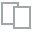
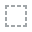
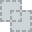
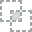
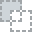
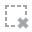
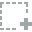
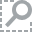
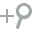
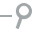
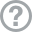
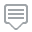
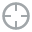
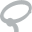
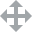
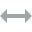
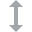
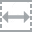
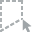
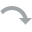
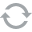
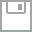
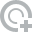
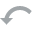
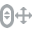
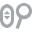
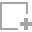
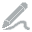
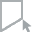
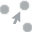
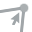
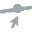

In [21]:
price_details2 = price_details_notnull.iloc[:,[3, 5, 6]]

price_details3 = price_details2.groupby('ad_name').sum()

price_details4 = pd.merge(price_details3, price_details2, on=['ad_name'], how='inner')

price_details5 = price_details4.drop(columns = ['price_string_y',])

price_details6 = price_details5.drop_duplicates()

corr_fat_anun = price_details6.iloc[:,[2, 0, 1]]
create_report(corr_fat_anun)


# **4. Qual a antecedência média das reservas?**
# **a. Esse número é maior ou menor para finais de semana?**


In [22]:
booked_on_date = price_details_notnull.iloc[:,[1,2]]

booked_on_date['date'] =  pd.to_datetime(booked_on_date['date'],
                              format='%Y-%m-%d')
booked_on_date['booked_on'] =  pd.to_datetime(booked_on_date['booked_on'],
                              format='%Y-%m-%d')
booked_on_date


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


booked_on       date
0      2020-11-17 2020-12-11
9      2020-12-30 2021-01-03
...           ...        ...
354518 2021-01-06 2021-02-13
354519 2021-03-05 2021-03-28

[164951 rows x 2 columns]

In [23]:
antec_reservas = booked_on_date.assign(antecedencia_reservas = booked_on_date['date'] - booked_on_date['booked_on'])
antec_reservas


booked_on       date antecedencia_reservas
0      2020-11-17 2020-12-11               24 days
9      2020-12-30 2021-01-03                4 days
...           ...        ...                   ...
354518 2021-01-06 2021-02-13               38 days
354519 2021-03-05 2021-03-28               23 days

[164951 rows x 3 columns]

In [25]:
antec_reservas = booked_on_date.assign(antecedencia_reservas = booked_on_date['date'] - booked_on_date['booked_on'])

med_antec_reservas = antec_reservas.iloc[:,[2]]

med_antec_reservas.mean()

antecedencia_reservas   32 days 08:26:27.787888524
dtype: timedelta64[ns]


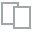
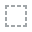
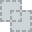
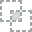
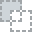
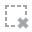
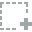
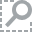
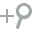
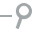
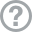
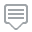
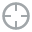
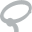
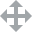
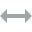
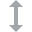
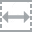
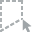
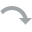
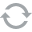
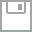
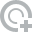
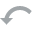
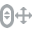
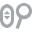
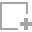
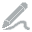
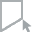
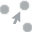
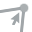
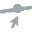

In [27]:
reserva_semana = antec_reservas['date'].dt.dayofweek
plot(reserva_semana)
      